## Библиотеки

In [25]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import string

In [26]:
warnings.filterwarnings('ignore')

## Данные

In [27]:
df = pd.read_csv('data/spam.csv', encoding='latin-1')
df.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [28]:
df = df.drop(['Unnamed: 2',	'Unnamed: 3', 'Unnamed: 4'], axis=1).rename(columns={'v1' : 'Label', 'v2' : 'SMS'})
df.head()

,Label,SMS
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Label   5572 non-null   object
 1   SMS     5572 non-null   object
dtypes: object(2)
memory usage: 87.2+ KB


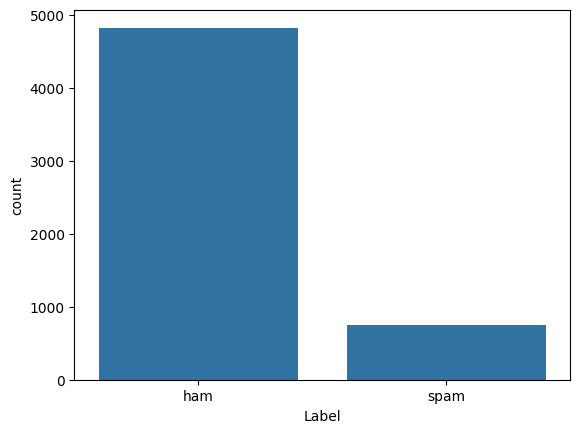

In [30]:
sns.countplot(df, x=df.Label);

In [31]:
df.Label.value_counts(normalize=True) * 100

Label
ham     86.593683
spam    13.406317
Name: proportion, dtype: float64

Данные очень сильно не сбалансированы.

## Предобработка данных

In [32]:
def prepross_text(line):
    '''Функция осуществляет препроцессинг текста.'''
    
    # Почистим строку от пунктуации, переведем в нижний регистр и токенизируем.
    exclude = set(string.punctuation)
    spls = ''.join(i for i in line.strip() if i not in exclude).lower().split()
    
    return spls

In [33]:
# Сделаем препроцессинг текста.
df['SMS'] = df['SMS'].apply(lambda x: prepross_text(x))
display(df.head())

,Label,SMS
0,ham,"[go, until, jurong, point, crazy, available, o..."
1,ham,"[ok, lar, joking, wif, u, oni]"
2,spam,"[free, entry, in, 2, a, wkly, comp, to, win, f..."
3,ham,"[u, dun, say, so, early, hor, u, c, already, t..."
4,ham,"[nah, i, dont, think, he, goes, to, usf, he, l..."


In [ ]:
# Разделим на тренировочную и тестовую выборки.
train_data = df.sample(frac=.8, random_state=13).reset_index(drop=True)
test_data = df.drop(train_data.index).reset_index(drop=True)
train_data.Label.value_counts(normalize=True)

In [36]:
test_data.Label.value_counts(normalize=True)

Label
ham     0.869838
spam    0.130162
Name: proportion, dtype: float64

### Список слов

In [37]:
vocabulary = list(set(train_data['SMS'].sum()))
vocabulary[5:15]

['busy',
 'rounderso',
 'wait',
 'pongal',
 '44',
 'everythin',
 'phrase',
 'workand',
 'fave',
 'nobbing']

In [38]:
len(vocabulary)

8453

### Частоты слов

In [39]:
# Для каждого SMS-сообщения посчитаем, сколько раз в нём встречается каждое слово.
word_counts_per_sms = pd.DataFrame([
    [row[1].count(word) for word in vocabulary]
    for _, row in train_data.iterrows()], columns=vocabulary)

word_counts_per_sms.head()

,outif,owed,f,tvlol,individualtime,busy,rounderso,wait,pongal,44,...,pod,chex,shijas,å£200,respond,orange,hari,tantrums,loose,stuffs
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [40]:
# Добавим частоты каждого слова в обучающий датасет.
train_data = pd.concat([train_data, word_counts_per_sms], axis=1)
train_data.head()

,Label,SMS,outif,owed,f,tvlol,individualtime,busy,rounderso,wait,...,pod,chex,shijas,å£200,respond,orange,hari,tantrums,loose,stuffs
0,ham,"[just, looked, it, up, and, addie, goes, back,...",0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,ham,"[nottel, software, name]",0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,ham,"[lol, enjoy, role, playing, much]",0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,ham,"[do, we, have, any, spare, power, supplies]",0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,ham,"[neva, mind, its, ok]",0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


### Значения для формулы Байеса

In [41]:
# Посчитаем необходимые значения для формулы Байеса.
alpha = 1

Nvoc = len(vocabulary)
Pspam = train_data['Label'].value_counts()['spam'] / train_data.shape[0]
Pham = train_data['Label'].value_counts()['ham'] / train_data.shape[0]
Nspam = train_data.loc[train_data['Label'] == 'spam', 'SMS'].apply(len).sum()
Nham = train_data.loc[train_data['Label'] == 'ham', 'SMS'].apply(len).sum()

In [42]:
def p_w_spam(word):
    if word in train_data.columns:
        return (train_data.loc[train_data['Label'] == 'spam', word].sum() + alpha) / (Nspam + alpha*Nvoc)
    else:
        return 1

def p_w_ham(word):
    if word in train_data.columns:
        return (train_data.loc[train_data['Label'] == 'ham', word].sum() + alpha) / (Nham + alpha*Nvoc)
    else:
        return 1

In [43]:
# Готовим алгоритм классификации.
def classify(message):
    p_spam_given_message = Pspam
    p_ham_given_message = Pham
    for word in message:
        p_spam_given_message *= p_w_spam(word)
        p_ham_given_message *= p_w_ham(word)
    if p_ham_given_message > p_spam_given_message:
        return 'ham'
    elif p_ham_given_message < p_spam_given_message:
        return 'spam'
    else:
        return 'классификация некорректна'

In [44]:
# Используем тестовые данные.
test_data['predicted'] = test_data['SMS'].map(classify)
test_data.head()

,Label,SMS,predicted
0,spam,"[welcome, to, ukmobiledate, this, msg, is, fre...",spam
1,ham,"[this, is, wishing, you, a, great, day, moji, ...",ham
2,ham,"[thanks, again, for, your, reply, today, when,...",ham
3,ham,"[sorry, i, flaked, last, night, shits, serious...",ham
4,ham,"[he, said, i, look, pretty, wif, long, hair, w...",ham


In [45]:
correct = (test_data['predicted'] == test_data['Label']).sum() / test_data.shape[0]
print(f"Правильных предсказаний {correct * 100:3f} %")

Правильных предсказаний 99.012567 %


In [46]:
test_data.loc[test_data['predicted'] != test_data['Label']].head()

,Label,SMS,predicted
54,spam,"[money, i, have, won, wining, number, 946, wot...",ham
67,spam,"[i, want, some, cock, my, hubbys, away, i, nee...",ham
97,ham,"[gettin, rdy, to, ship, comp]",spam
140,ham,"[have, you, laid, your, airtel, line, to, rest]",spam
216,spam,"[hi, babe, its, chloe, how, r, u, i, was, smas...",ham


## Наивный байесовский классификатор в sklearn

In [47]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB

In [48]:
df = pd.read_csv('data/spam.csv', encoding='latin-1')

In [ ]:
# Сделаем препроцессинг текста.
df['SMS'] = df['SMS'].apply(lambda x: prepross_text(x))
display(df.head())

In [ ]:
# Преобразуем строки в векторный вид – то есть, 
# снова создадим таблицу с частотами слов. 
# Но в этот раз воспользуемся встроенным в 
# sklearn классов CountVectorizer().
vectorizer = CountVectorizer()
X = vectorizer.fit_transform(df["SMS"])
y = df["Label"]

print(X.shape, y.shape)